In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imghdr
from tensorflow.keras.preprocessing import image
from keras.callbacks import TensorBoard


C:\Users\KIIT01\AppData\Local\Temp\ipykernel_19896\693639712.py:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


## DATA Processing

In [7]:
data_dir = 'DATASET/DATASET/TRAIN'

### DATA CLEANSING

In [3]:
# image_exts = ['jpeg','jpg', 'bmp', 'png']

# for image_class in os.listdir(data_dir): 
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             print('Issue with image {}'.format(image_path))
#             # os.remove(image_path)
    

In [8]:
#Import data as train,val and test
#creating a dataset
train_data = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",seed=40)
val_data = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=40)


Found 34648 files belonging to 4 classes.
Using 27719 files for training.
Found 34648 files belonging to 4 classes.
Using 6929 files for validation.


In [5]:
##visualize data
data_iterator = train_data.as_numpy_iterator()
batch = data_iterator.next()

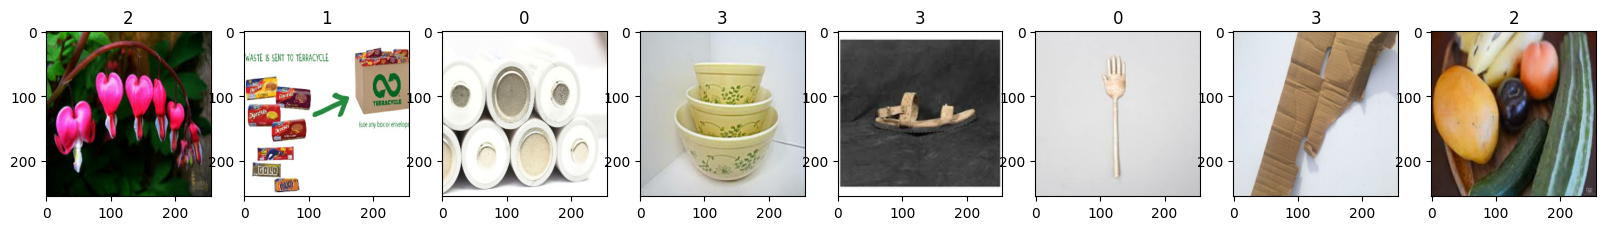

In [6]:
#to visualize the batch
fig,ax = plt.subplots(ncols=8,figsize=(20,20))
for idx,img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    

# class 0 - Hazardous
# class 1 -NR
# class 2 - organic
# class 3 - recycle

In [9]:
#scaling the data divide by 255
train_data = train_data.map(lambda x,y:(x/255,y))
val_data = val_data.map(lambda x,y:(x/255,y))

In [22]:
##visualize data
data_iterator = train_data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].max()

1.0

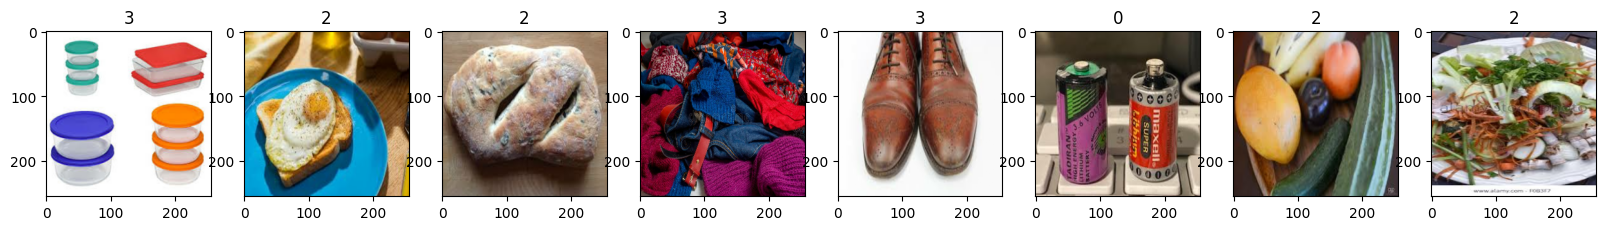

In [23]:
fig,ax = plt.subplots(ncols=8,figsize=(20,20))
for idx,img in enumerate(batch[0][:8]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])


# class 0 - Hazardous
# class 1 -NR
# class 2 - organic
# class 3 - recycle
    

## Building the model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense


In [11]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
# model.add(tf.keras.layers.MaxPooling2D((2, 2)))
# model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D((2, 2)))
# model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dense(4, activation='softmax'))

# model.summary()
#Too long epochs and overfitting

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 flatten (Flatten)           (None, 57600)            

In [15]:
tensor_board = TensorBoard(log_dir='./Graph', histogram_freq=2, write_graph=True, write_images=True)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics =["accuracy"])
result = model.fit(train_data, epochs = 20, steps_per_epoch=len(train_data),validation_data=val_data,validation_steps=len(val_data),callbacks=[tensor_board])


Epoch 1/20


867/867 [==============================] - 548s 630ms/step - loss: 0.9119 - accuracy: 0.6459 - val_loss: 0.7851 - val_accuracy: 0.6969
Epoch 2/20
867/867 [==============================] - 440s 507ms/step - loss: 0.7248 - accuracy: 0.7090 - val_loss: 0.7146 - val_accuracy: 0.7093
Epoch 3/20
867/867 [==============================] - 436s 503ms/step - loss: 0.6007 - accuracy: 0.7608 - val_loss: 0.8057 - val_accuracy: 0.6985
Epoch 4/20
867/867 [==============================] - 438s 505ms/step - loss: 0.4230 - accuracy: 0.8332 - val_loss: 1.1113 - val_accuracy: 0.6685
Epoch 5/20
867/867 [==============================] - 455s 524ms/step - loss: 0.2693 - accuracy: 0.9002 - val_loss: 1.1725 - val_accuracy: 0.6844
Epoch 6/20
867/867 [==============================] - 447s 515ms/step - loss: 0.1879 - accuracy: 0.9358 - val_loss: 1.3724 - val_accuracy: 0.6789
Epoch 7/20
867/867 [==============================] - 446s 513ms/step - loss: 0.1462 - accuracy: 0.9520 - val_loss: 1.550

In [16]:
model.save(os.path.join('models','final_model.h5'))

d:\clge\prjml\imageclassification\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


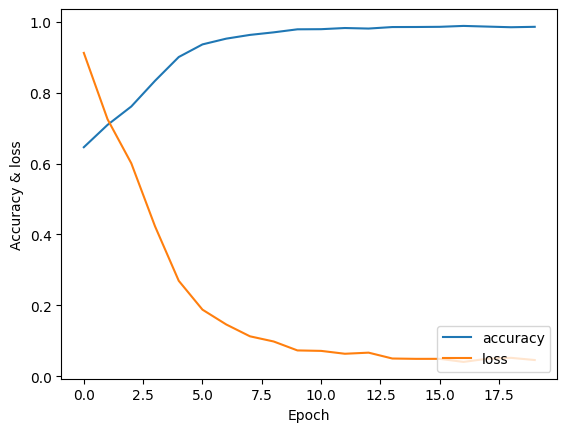

In [20]:
#plot the accuracy
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy & loss')
plt.legend(loc='lower right')

## Prediction

In [21]:
#fucntion to predict the class 

output_class = ["Hazardous","NR","Organic","Recycle"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (256,256))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")
  

In [3]:
import pickle
#store the model as pickel file
pickle.dump(model, open('final_model.pkl', 'wb'))

In [ ]:
#load the model
from tensorflow.keras.models import load_model
model = load_model(os.path.join('models','final_model.h5'))

In [ ]:
#CALL THE PREDCIT FUNCTION
waste_prediction("data/test/staple.jpg")